In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [2]:
df['hour_beginning']=pd.to_datetime(df['hour_beginning'])
df['weekday']=df['hour_beginning'].dt.weekday
df1=df[df['weekday']!=0]
df1=df1[['hour_beginning','Pedestrians']]
df1['date']=df1.hour_beginning.dt.date
df1=df1.drop('hour_beginning',axis=1).groupby('date').sum()

/var/folders/md/n28gyyd92db3bxj4qdp6fd940000gn/T/ipykernel_19405/1418901921.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning']=pd.to_datetime(df['hour_beginning'])


In [3]:
df1.index=df1.index.astype(str)

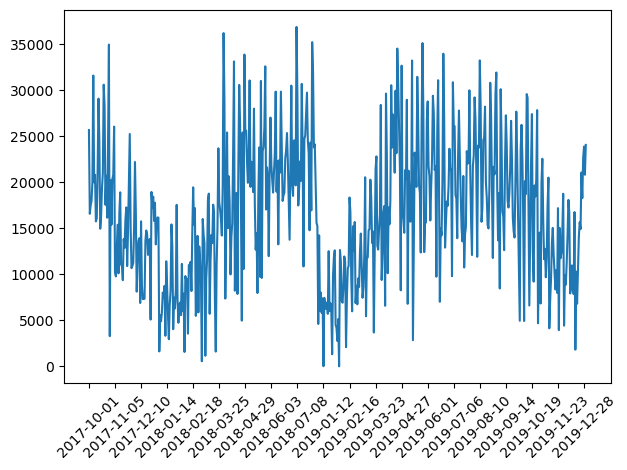

In [64]:
plt.figure()
plt.plot(df1)
plt.xticks(range(0,len(df1.index),30), df1.index[::30], rotation=45)
plt.tight_layout()
plt.show()

In [13]:
df2=df[df['hour_beginning'].dt.year==2019].sort_values(by='hour_beginning').reset_index(drop=True)

In [16]:
df2_1=df2[['Pedestrians','weather_summary']]

In [17]:
df2_one_hot=pd.get_dummies(df2_1,['weather_summary'])

In [25]:
df2_heatmap=df2_one_hot.corr()

In [23]:
import seaborn as sns

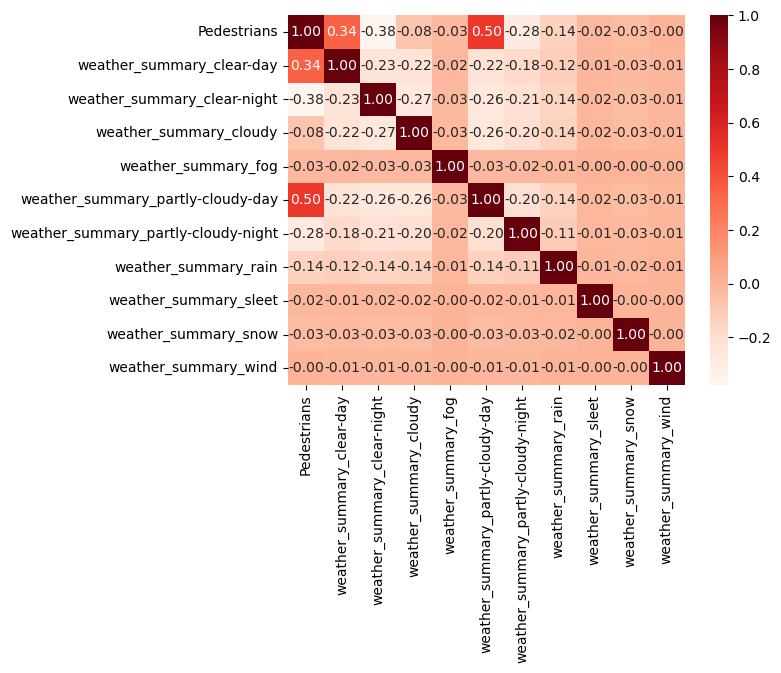

In [31]:
plt.figure()
sns.heatmap(df2_heatmap,annot=True,cmap='Reds',fmt=".2f")
plt.show()

In [33]:
df.hour_beginning.dt.hour

0         0
1        22
2        23
3        21
4         3
         ..
16052     4
16053     6
16054    16
16055    18
16056     0
Name: hour_beginning, Length: 16057, dtype: int32

In [53]:
def classify(dt):
    if dt>=8 and dt<12:
        return 'morning'
    elif dt>=12 and dt<18:
        return 'afternoon'
    elif dt>=18 and dt<24:
        return 'evening'
    elif dt>=0 and dt<8:
        return 'night'

In [55]:
df3=df

In [56]:
df3['phase']=df.hour_beginning.dt.hour.apply(classify)

<Axes: xlabel='phase', ylabel='Pedestrians'>

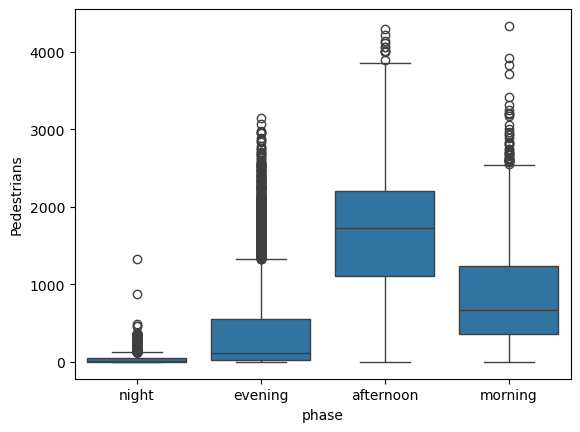

In [62]:
sns.boxplot(data=df3[['Pedestrians','phase']],x='phase',y='Pedestrians')